#### Feature Engineering

In [6]:
# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
df0 = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\GitHub\credit_line_eligibility\data\cleaned_data.csv")
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,1.202703,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,1.089146,1990-06-01,16.0,0.0,1.434536,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,0.060161,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,0.623256,2004-07-01,17.0,0.0,0.681703,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,0,RENT,-0.796125,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,-0.513208,2007-08-01,13.0,0.0,0.079328,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,-0.319423,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,-2.120210,2006-09-01,6.0,0.0,-0.739714,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,-0.281432,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,1.893119,1999-03-01,13.0,0.0,0.927930,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [28]:
# Deriving state and zip code from address

df0[['state', 'zip_code']] = df0['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [29]:
df0['zip_code'].nunique(), df0['state'].nunique()

(10, 54)

In [31]:
#Drop address
df0.drop(["address"], axis = 1, inplace=True)

In [32]:
df0['zip_code'] = df0['zip_code'].astype('category')
df0['state'] = df0['state'].astype('category')

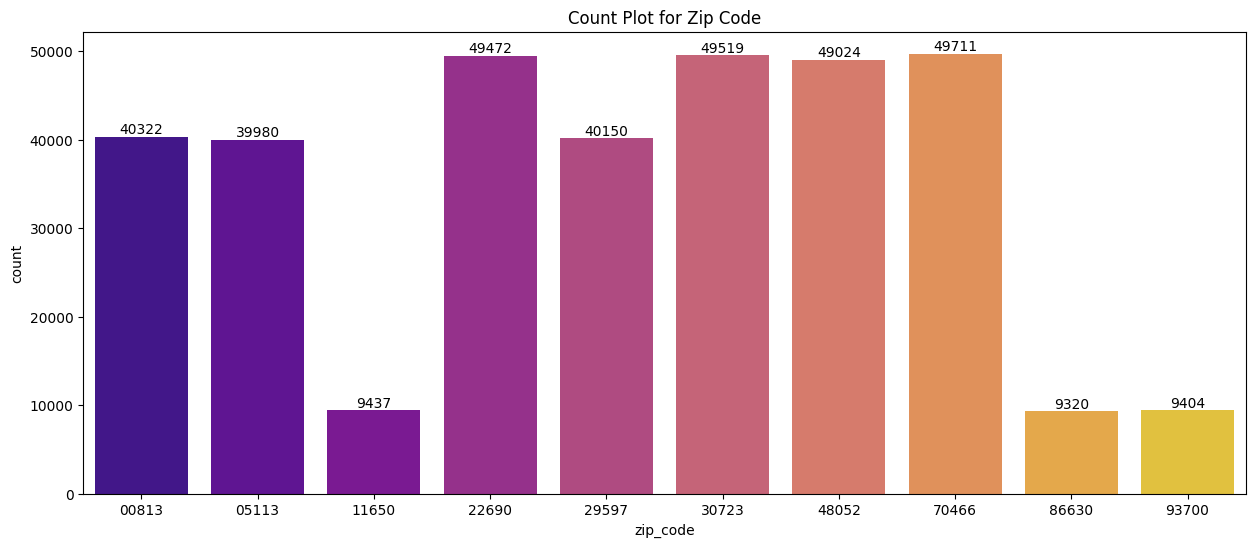

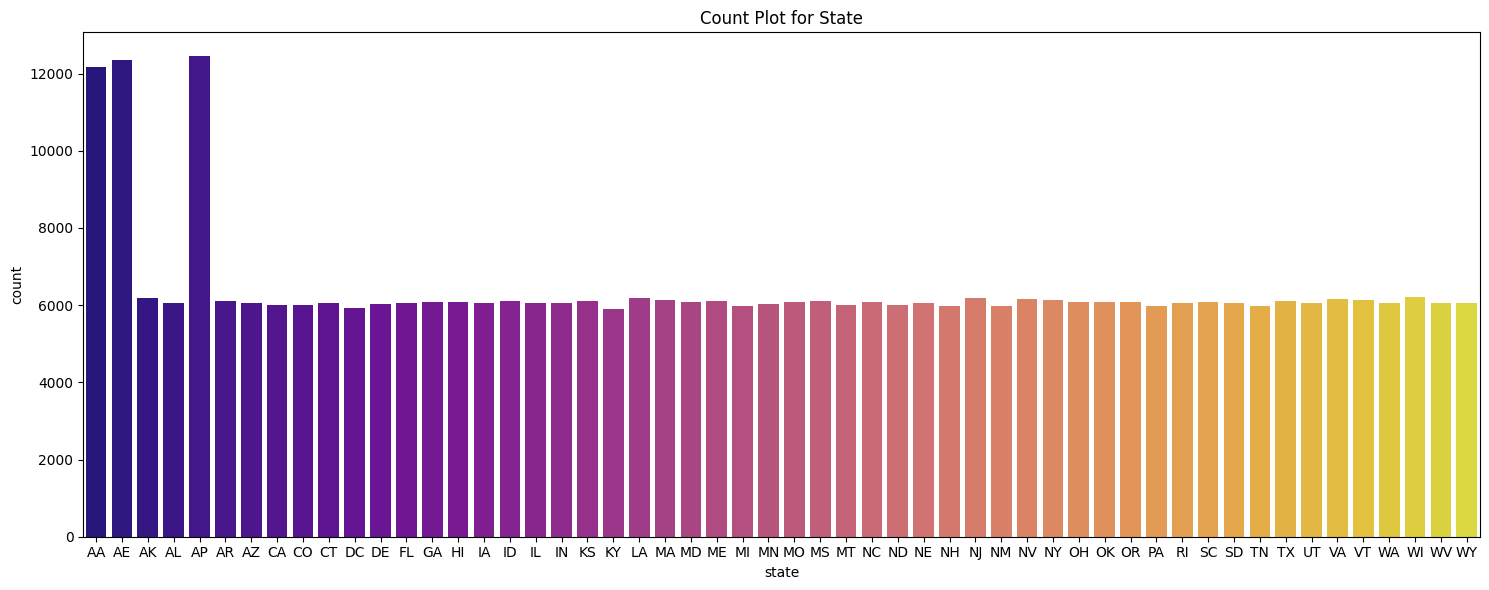

In [34]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=df0['zip_code'], palette='plasma')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=0.01)
plt.title(f'Count Plot for Zip Code')

plt.figure(figsize=(15,6))
ax = sns.countplot(x=df0['state'], palette='plasma')
plt.title(f'Count Plot for State')

plt.tight_layout()
plt.show()

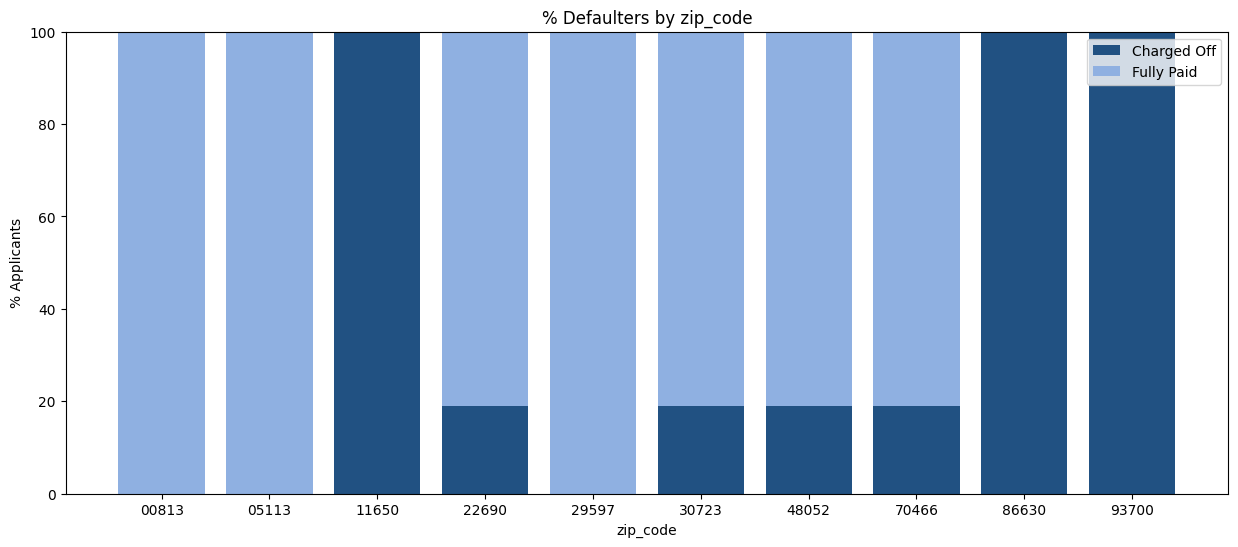

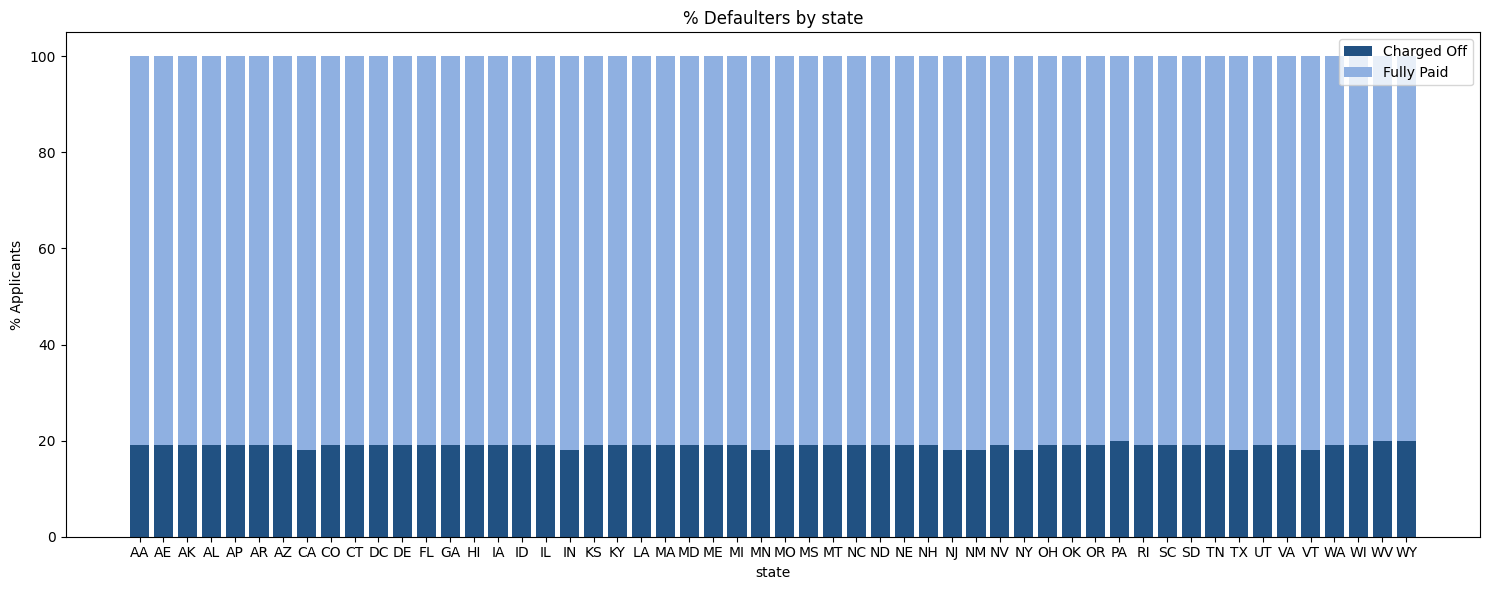

In [25]:
cols = ['zip_code', 'state']

# plt.figure(figsize=(14,20))
# count=1
for col in cols:
  plt.figure(figsize=(15,6))
#   ax=plt.subplot(2,1,count)

  data = df0.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#215182')
  plt.bar(data[col],data['Fully Paid'], color='#8FB0E1', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
#   count += 1

plt.tight_layout()
plt.show()

### Feature Engineering: Address Extraction

During the feature engineering process, we extracted the zip code and state from the address column to assess their potential impact on the model.

##### Findings:
1. The dataset contained only 10 unique zip codes and 50 unique states.
2. Each state was uniquely represented, meaning no state had overlapping zip codes, which is unusual since real-world zip codes often span multiple states.
3. The distribution of default rates across zip codes and states appeared unnatural and unvarying, suggesting that these features do not contribute meaningful variability to the model.
4. The extracted features did not provide additional predictive power.


Since these features do not introduce valuable information for model training, we have chosen to drop them from the final dataset.

